# Predict the Automobile Insurance claim

In [434]:
# load the datasets
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.utils import shuffle

claim = pd.read_csv("Auto_Insurance_Claims_amount.csv")
fraud = pd.read_csv("Automobile_insurance_fraud.csv")
claim.info()
fraud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 26 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   Country                        9134 non-null   object 
 2   State Code                     9134 non-null   object 
 3   State                          9134 non-null   object 
 4   Claim Amount                   9134 non-null   float64
 5   Response                       9134 non-null   object 
 6   Coverage                       9134 non-null   object 
 7   Education                      9134 non-null   object 
 8   Effective To Date              9134 non-null   object 
 9   EmploymentStatus               9134 non-null   object 
 10  Gender                         9134 non-null   object 
 11  Income                         9134 non-null   int64  
 12  Location Code                  9134 non-null   o

In [435]:
claim

,Customer,Country,State Code,State,Claim Amount,Response,Coverage,Education,Effective To Date,EmploymentStatus,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Claim Reason,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,US,KS,Kansas,276.351928,No,Basic,Bachelor,2/24/11,Employed,...,5,0,1,Corporate Auto,Corporate L3,Collision,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,US,NE,Nebraska,697.953590,No,Extended,Bachelor,1/31/11,Unemployed,...,42,0,8,Personal Auto,Personal L3,Scratch/Dent,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,US,OK,Oklahoma,1288.743165,No,Premium,Bachelor,2/19/11,Employed,...,38,0,2,Personal Auto,Personal L3,Collision,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,US,MO,Missouri,764.586183,No,Basic,Bachelor,1/20/11,Unemployed,...,65,0,7,Corporate Auto,Corporate L2,Collision,Call Center,529.881344,SUV,Medsize
4,HB64268,US,KS,Kansas,281.369258,No,Basic,Bachelor,2/3/11,Employed,...,44,0,1,Personal Auto,Personal L1,Collision,Agent,138.130879,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,US,MO,Missouri,2340.598798,No,Basic,Bachelor,2/10/11,Employed,...,89,0,2,Personal Auto,Personal L1,Hail,Web,198.234764,Four-Door Car,Medsize
9130,PK87824,US,MO,Missouri,309.651122,Yes,Extended,College,2/12/11,Employed,...,28,0,1,Corporate Auto,Corporate L3,Collision,Branch,379.200000,Four-Door Car,Medsize
9131,TD14365,US,MO,Missouri,816.389043,No,Extended,Bachelor,2/6/11,Unemployed,...,37,3,2,Corporate Auto,Corporate L2,Collision,Branch,790.784983,Four-Door Car,Medsize
9132,UP19263,US,MO,Missouri,752.444244,No,Extended,College,2/3/11,Employed,...,3,0,3,Personal Auto,Personal L2,Scratch/Dent,Branch,691.200000,Four-Door Car,Large


In [436]:
claim.isnull().sum()

Customer                         0
Country                          0
State Code                       0
State                            0
Claim Amount                     0
Response                         0
Coverage                         0
Education                        0
Effective To Date                0
EmploymentStatus                 0
Gender                           0
Income                           0
Location Code                    0
Marital Status                   0
Monthly Premium Auto             0
Months Since Last Claim          0
Months Since Policy Inception    0
Number of Open Complaints        0
Number of Policies               0
Policy Type                      0
Policy                           0
Claim Reason                     0
Sales Channel                    0
Total Claim Amount               0
Vehicle Class                    0
Vehicle Size                     0
dtype: int64

In [437]:
claim = claim.replace('?',np.NaN)

claim.isnull().any()

Customer                         False
Country                          False
State Code                       False
State                            False
Claim Amount                     False
Response                         False
Coverage                         False
Education                        False
Effective To Date                False
EmploymentStatus                 False
Gender                           False
Income                           False
Location Code                    False
Marital Status                   False
Monthly Premium Auto             False
Months Since Last Claim          False
Months Since Policy Inception    False
Number of Open Complaints        False
Number of Policies               False
Policy Type                      False
Policy                           False
Claim Reason                     False
Sales Channel                    False
Total Claim Amount               False
Vehicle Class                    False
Vehicle Size             

In [438]:
cc=claim.columns
cc

Index(['Customer', 'Country', 'State Code', 'State', 'Claim Amount',
       'Response', 'Coverage', 'Education', 'Effective To Date',
       'EmploymentStatus', 'Gender', 'Income', 'Location Code',
       'Marital Status', 'Monthly Premium Auto', 'Months Since Last Claim',
       'Months Since Policy Inception', 'Number of Open Complaints',
       'Number of Policies', 'Policy Type', 'Policy', 'Claim Reason',
       'Sales Channel', 'Total Claim Amount', 'Vehicle Class', 'Vehicle Size'],
      dtype='object')

In [439]:
claim.dtypes

Customer                          object
Country                           object
State Code                        object
State                             object
Claim Amount                     float64
Response                          object
Coverage                          object
Education                         object
Effective To Date                 object
EmploymentStatus                  object
Gender                            object
Income                             int64
Location Code                     object
Marital Status                    object
Monthly Premium Auto               int64
Months Since Last Claim            int64
Months Since Policy Inception      int64
Number of Open Complaints          int64
Number of Policies                 int64
Policy Type                       object
Policy                            object
Claim Reason                      object
Sales Channel                     object
Total Claim Amount               float64
Vehicle Class   

In [440]:
claim.apply(lambda x : len(x.unique()))

Customer                         9134
Country                             1
State Code                          5
State                               5
Claim Amount                     8041
Response                            2
Coverage                            3
Education                           5
Effective To Date                  59
EmploymentStatus                    5
Gender                              2
Income                           5694
Location Code                       3
Marital Status                      3
Monthly Premium Auto              202
Months Since Last Claim            36
Months Since Policy Inception     100
Number of Open Complaints           6
Number of Policies                  9
Policy Type                         3
Policy                              9
Claim Reason                        4
Sales Channel                       4
Total Claim Amount               5106
Vehicle Class                       6
Vehicle Size                        3
dtype: int64

In [441]:
for col in claim.columns:
    if claim[col].dtype=="object":
        print("column name is: {} and number of distinct values: {}".format(col,len(claim[col].value_counts())))
        print()

column name is: Customer and number of distinct values: 9134

column name is: Country and number of distinct values: 1

column name is: State Code and number of distinct values: 5

column name is: State and number of distinct values: 5

column name is: Response and number of distinct values: 2

column name is: Coverage and number of distinct values: 3

column name is: Education and number of distinct values: 5

column name is: Effective To Date and number of distinct values: 59

column name is: EmploymentStatus and number of distinct values: 5

column name is: Gender and number of distinct values: 2

column name is: Location Code and number of distinct values: 3

column name is: Marital Status and number of distinct values: 3

column name is: Policy Type and number of distinct values: 3

column name is: Policy and number of distinct values: 9

column name is: Claim Reason and number of distinct values: 4

column name is: Sales Channel and number of distinct values: 4

column name is: V

In [442]:
#frequency of categories
for col in claim.columns:
    if claim[col].dtype=="object":
        print(claim[col].value_counts())
        print()

ER65086    1
NR99710    1
OP54725    1
GB70718    1
RX31862    1
          ..
HR64684    1
AF49027    1
GS98873    1
XP69351    1
CK31454    1
Name: Customer, Length: 9134, dtype: int64

US    9134
Name: Country, dtype: int64

MO    3150
IA    2601
NE    1703
OK     882
KS     798
Name: State Code, dtype: int64

Missouri    3150
Iowa        2601
Nebraska    1703
Oklahoma     882
Kansas       798
Name: State, dtype: int64

No     7826
Yes    1308
Name: Response, dtype: int64

Basic       5568
Extended    2742
Premium      824
Name: Coverage, dtype: int64

Bachelor                2748
College                 2681
High School or Below    2622
Master                   741
Doctor                   342
Name: Education, dtype: int64

1/10/11    195
1/27/11    194
2/14/11    186
1/26/11    181
1/17/11    180
1/19/11    179
1/31/11    178
1/3/11     178
1/20/11    173
2/26/11    169
1/28/11    169
2/19/11    168
2/27/11    167
1/5/11     167
1/11/11    166
2/4/11     164
2/10/11    161
2/28/11 

In [443]:
claim.drop(columns=["Customer","Country","State Code","Effective To Date"],inplace=True)

In [444]:
claim

,State,Claim Amount,Response,Coverage,Education,EmploymentStatus,Gender,Income,Location Code,Marital Status,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Claim Reason,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,Kansas,276.351928,No,Basic,Bachelor,Employed,F,56274,Suburban,Married,...,5,0,1,Corporate Auto,Corporate L3,Collision,Agent,384.811147,Two-Door Car,Medsize
1,Nebraska,697.953590,No,Extended,Bachelor,Unemployed,F,0,Suburban,Single,...,42,0,8,Personal Auto,Personal L3,Scratch/Dent,Agent,1131.464935,Four-Door Car,Medsize
2,Oklahoma,1288.743165,No,Premium,Bachelor,Employed,F,48767,Suburban,Married,...,38,0,2,Personal Auto,Personal L3,Collision,Agent,566.472247,Two-Door Car,Medsize
3,Missouri,764.586183,No,Basic,Bachelor,Unemployed,M,0,Suburban,Married,...,65,0,7,Corporate Auto,Corporate L2,Collision,Call Center,529.881344,SUV,Medsize
4,Kansas,281.369258,No,Basic,Bachelor,Employed,M,43836,Rural,Single,...,44,0,1,Personal Auto,Personal L1,Collision,Agent,138.130879,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,Missouri,2340.598798,No,Basic,Bachelor,Employed,M,71941,Urban,Married,...,89,0,2,Personal Auto,Personal L1,Hail,Web,198.234764,Four-Door Car,Medsize
9130,Missouri,309.651122,Yes,Extended,College,Employed,F,21604,Suburban,Divorced,...,28,0,1,Corporate Auto,Corporate L3,Collision,Branch,379.200000,Four-Door Car,Medsize
9131,Missouri,816.389043,No,Extended,Bachelor,Unemployed,M,0,Suburban,Single,...,37,3,2,Corporate Auto,Corporate L2,Collision,Branch,790.784983,Four-Door Car,Medsize
9132,Missouri,752.444244,No,Extended,College,Employed,M,21941,Suburban,Married,...,3,0,3,Personal Auto,Personal L2,Scratch/Dent,Branch,691.200000,Four-Door Car,Large


In [445]:
claim.describe

<bound method NDFrame.describe of          State  Claim Amount Response  Coverage Education EmploymentStatus  \
0       Kansas    276.351928       No     Basic  Bachelor         Employed   
1     Nebraska    697.953590       No  Extended  Bachelor       Unemployed   
2     Oklahoma   1288.743165       No   Premium  Bachelor         Employed   
3     Missouri    764.586183       No     Basic  Bachelor       Unemployed   
4       Kansas    281.369258       No     Basic  Bachelor         Employed   
...        ...           ...      ...       ...       ...              ...   
9129  Missouri   2340.598798       No     Basic  Bachelor         Employed   
9130  Missouri    309.651122      Yes  Extended   College         Employed   
9131  Missouri    816.389043       No  Extended  Bachelor       Unemployed   
9132  Missouri    752.444244       No  Extended   College         Employed   
9133  Missouri    261.183687       No  Extended   College       Unemployed   

     Gender  Income Location 

In [446]:
fraud

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,16-07-1991,OH,500/1000,1000,1310.80,0,431289,...,?,87200,17440,8720,61040,Honda,Accord,2006,N,NaN
996,285,41,186934,05-01-2014,IL,100/300,1000,1436.79,0,608177,...,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N,NaN
997,130,34,918516,17-02-2003,OH,250/500,500,1383.49,3000000,442797,...,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N,NaN
998,458,62,533940,18-11-2011,IL,500/1000,2000,1356.92,5000000,441714,...,YES,46980,5220,5220,36540,Audi,A5,1998,N,NaN


In [447]:
fraud.isnull().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

In [448]:
fraud.drop(columns=["_c39"],inplace=True)

In [449]:
fraud = fraud.replace('?',np.NaN)

fraud.isnull().any()

months_as_customer             False
age                            False
policy_number                  False
policy_bind_date               False
policy_state                   False
policy_csl                     False
policy_deductable              False
policy_annual_premium          False
umbrella_limit                 False
insured_zip                    False
insured_sex                    False
insured_education_level        False
insured_occupation             False
insured_hobbies                False
insured_relationship           False
capital-gains                  False
capital-loss                   False
incident_date                  False
incident_type                  False
collision_type                  True
incident_severity              False
authorities_contacted          False
incident_state                 False
incident_city                  False
incident_location              False
incident_hour_of_the_day       False
number_of_vehicles_involved    False
p

In [450]:
fraud.isnull().sum()

months_as_customer               0
age                              0
policy_number                    0
policy_bind_date                 0
policy_state                     0
policy_csl                       0
policy_deductable                0
policy_annual_premium            0
umbrella_limit                   0
insured_zip                      0
insured_sex                      0
insured_education_level          0
insured_occupation               0
insured_hobbies                  0
insured_relationship             0
capital-gains                    0
capital-loss                     0
incident_date                    0
incident_type                    0
collision_type                 178
incident_severity                0
authorities_contacted            0
incident_state                   0
incident_city                    0
incident_location                0
incident_hour_of_the_day         0
number_of_vehicles_involved      0
property_damage                360
bodily_injuries     

In [451]:
# missing value treatment using fillna

# we will replace the '?' by the most common collision type as we are unaware of the type.
fraud['collision_type'].fillna(fraud['collision_type'].mode()[0], inplace = True)

# It may be the case that there are no responses for property damage then we might take it as No property damage.
fraud['property_damage'].fillna('NO', inplace = True)

# again, if there are no responses fpr police report available then we might take it as No report available
fraud['police_report_available'].fillna('NO', inplace = True)

fraud.isnull().any().any()

False

In [452]:
fraud.apply(lambda x : len(x.unique()))

months_as_customer              391
age                              46
policy_number                  1000
policy_bind_date                951
policy_state                      3
policy_csl                        3
policy_deductable                 3
policy_annual_premium           991
umbrella_limit                   11
insured_zip                     995
insured_sex                       2
insured_education_level           7
insured_occupation               14
insured_hobbies                  20
insured_relationship              6
capital-gains                   338
capital-loss                    354
incident_date                    60
incident_type                     4
collision_type                    3
incident_severity                 4
authorities_contacted             5
incident_state                    7
incident_city                     7
incident_location              1000
incident_hour_of_the_day         24
number_of_vehicles_involved       4
property_damage             

In [453]:
for col in fraud.columns:
    if fraud[col].dtype=="object":
        print("column name is: {} and number of distinct values: {}".format(col,len(fraud[col].value_counts())))
        print()

column name is: policy_bind_date and number of distinct values: 951

column name is: policy_state and number of distinct values: 3

column name is: policy_csl and number of distinct values: 3

column name is: insured_sex and number of distinct values: 2

column name is: insured_education_level and number of distinct values: 7

column name is: insured_occupation and number of distinct values: 14

column name is: insured_hobbies and number of distinct values: 20

column name is: insured_relationship and number of distinct values: 6

column name is: incident_date and number of distinct values: 60

column name is: incident_type and number of distinct values: 4

column name is: collision_type and number of distinct values: 3

column name is: incident_severity and number of distinct values: 4

column name is: authorities_contacted and number of distinct values: 5

column name is: incident_state and number of distinct values: 7

column name is: incident_city and number of distinct values: 7



In [454]:
#frequency of categories
for col in fraud.columns:
    if fraud[col].dtype=="object":
        print(fraud[col].value_counts())
        print()

01-01-2006    3
05-08-1992    3
28-04-1992    3
03-01-2004    2
19-09-1995    2
             ..
18-11-1994    1
09-04-1999    1
09-03-2007    1
14-03-1995    1
18-06-2011    1
Name: policy_bind_date, Length: 951, dtype: int64

OH    352
IL    338
IN    310
Name: policy_state, dtype: int64

250/500     351
100/300     349
500/1000    300
Name: policy_csl, dtype: int64

FEMALE    537
MALE      463
Name: insured_sex, dtype: int64

JD             161
High School    160
Associate      145
MD             144
Masters        143
PhD            125
College        122
Name: insured_education_level, dtype: int64

machine-op-inspct    93
prof-specialty       85
tech-support         78
sales                76
exec-managerial      76
craft-repair         74
transport-moving     72
priv-house-serv      71
other-service        71
armed-forces         69
adm-clerical         65
protective-serv      63
handlers-cleaners    54
farming-fishing      53
Name: insured_occupation, dtype: int64

reading       

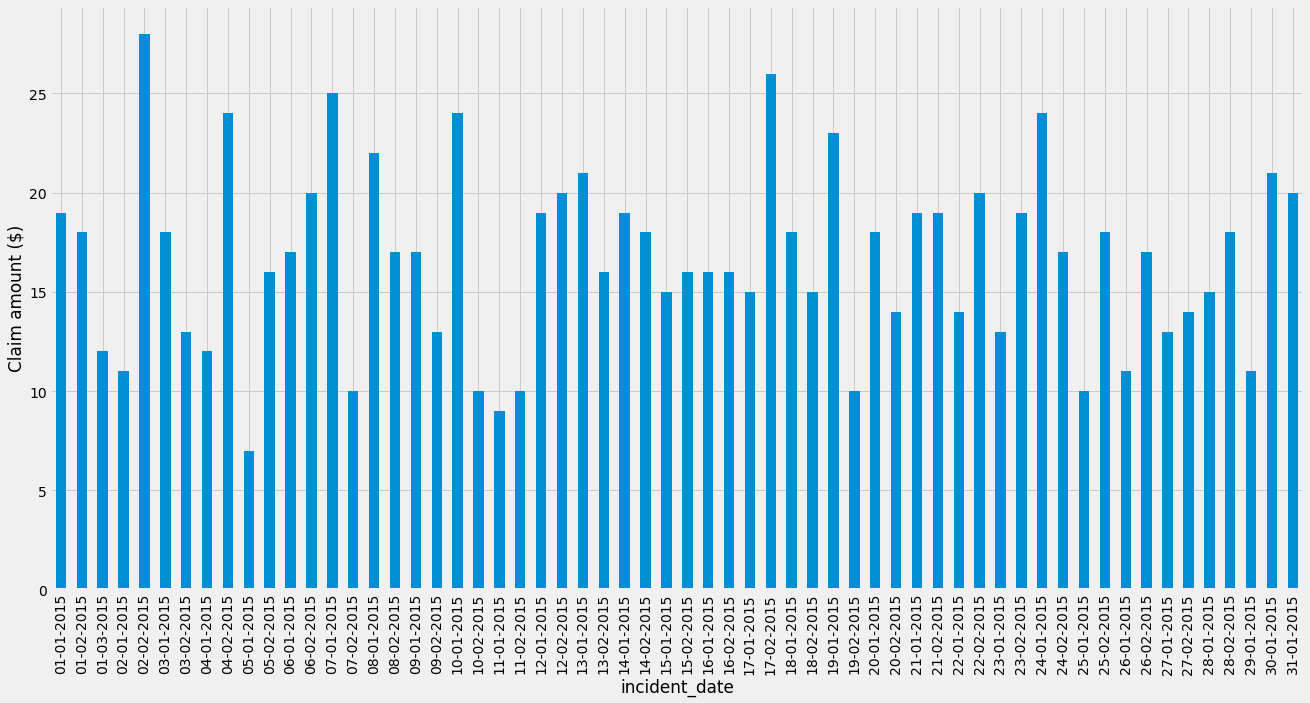

In [455]:
plt.style.use('fivethirtyeight')
fig=plt.figure(figsize=(20,10))
ax=fraud.groupby('incident_date').total_claim_amount.count().plot.bar(ylim=0)
ax.set_ylabel('Claim amount ($)')
plt.show()

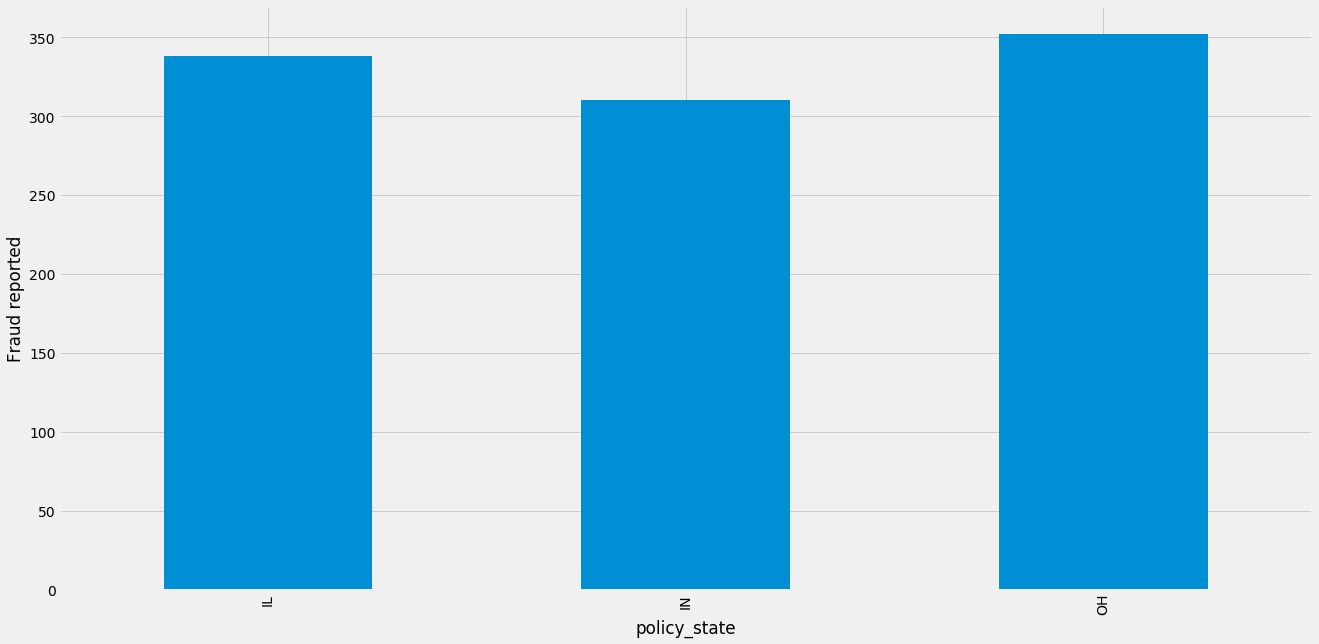

In [456]:
plt.style.use('fivethirtyeight')
fig=plt.figure(figsize=(20,10))
ax=fraud.groupby('policy_state').fraud_reported.count().plot.bar(ylim=0)
ax.set_ylabel('Fraud reported')
plt.show()

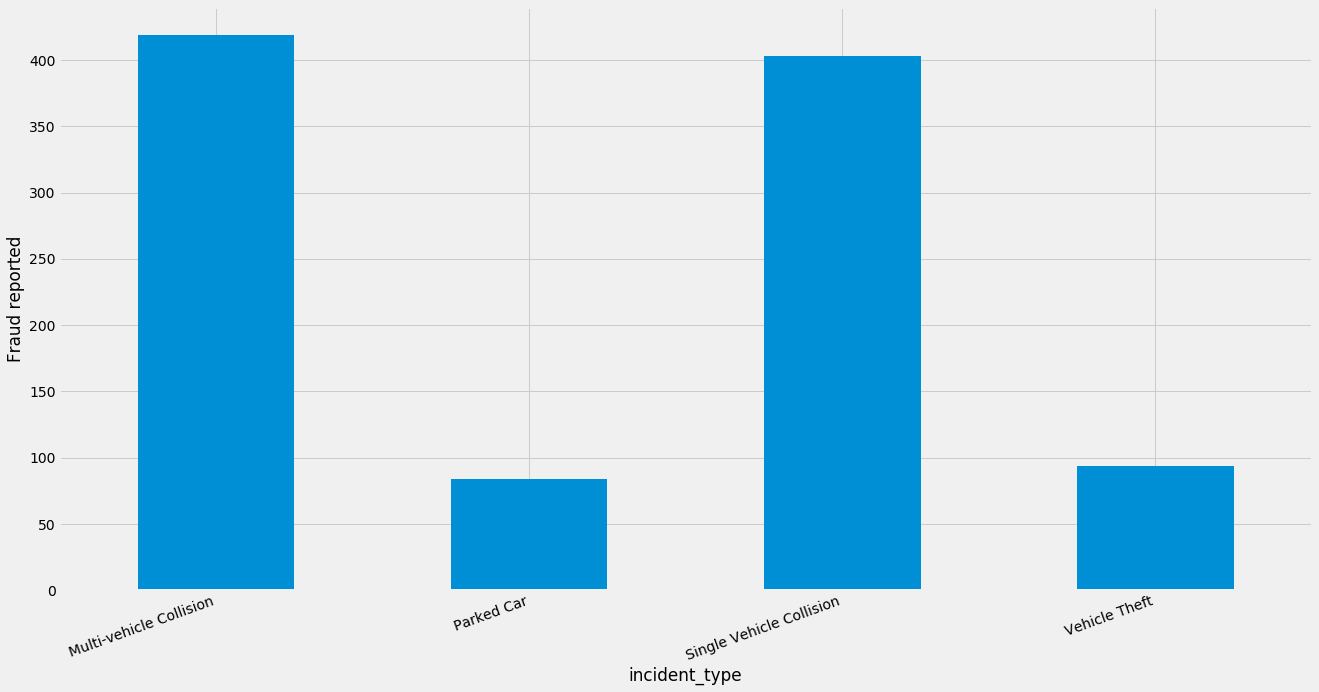

In [457]:
plt.style.use('fivethirtyeight')
fig=plt.figure(figsize=(20,10))
ax=fraud.groupby('incident_type').fraud_reported.count().plot.bar(ylim=0)
ax.set_xticklabels(ax.get_xticklabels(), rotation=20, ha="right")
ax.set_ylabel('Fraud reported')
plt.show()

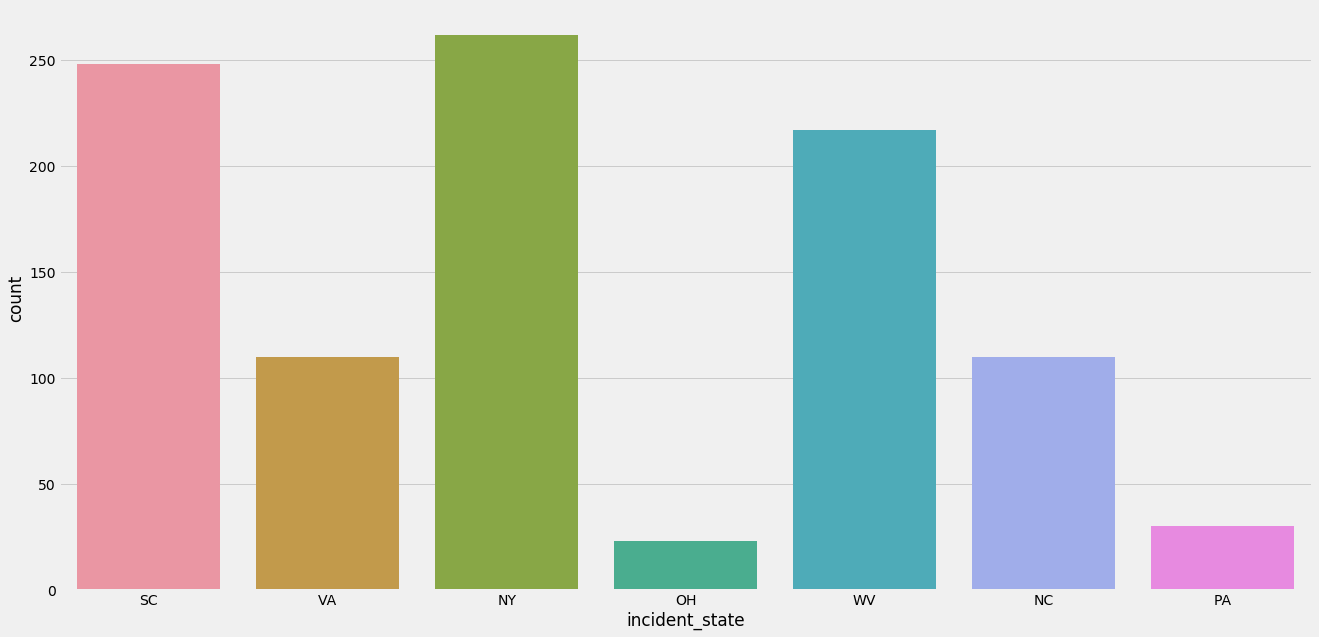

In [458]:
plt.style.use('fivethirtyeight')
fig=plt.figure(figsize=(20,10))
ax=sns.countplot(x='incident_state', data=fraud)

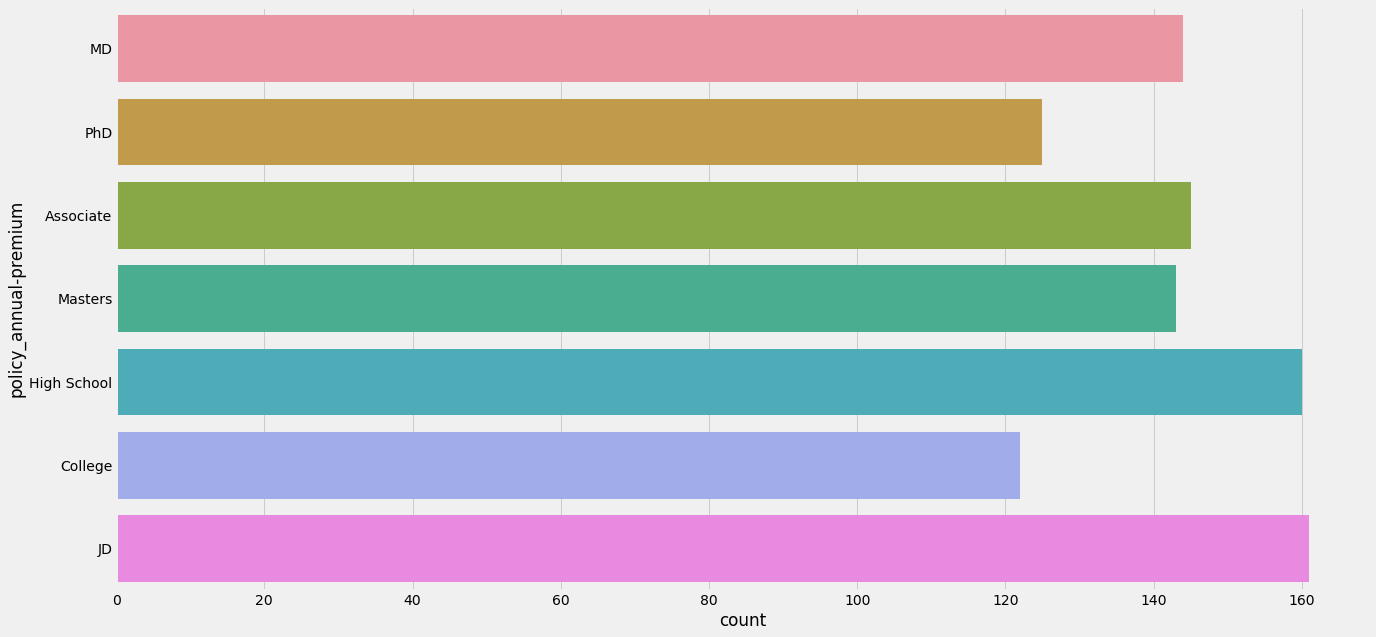

In [459]:
fig=plt.figure(figsize=(20,10))
ax=sns.countplot(y='insured_education_level', data=fraud)
ax.set_ylabel('policy_annual-premium')
plt.show()

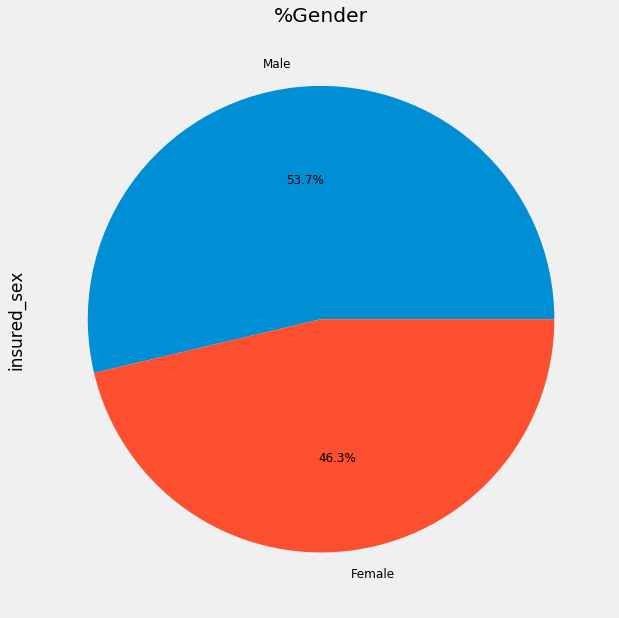

In [460]:
fig=plt.figure(figsize=(20,10))
ax=(fraud['insured_sex'].value_counts()*100.0/len(fraud))\
.plot.pie(autopct='%.1f%%', labels=['Male', 'Female'], fontsize=12)
ax.set_title('%Gender')
plt.show()

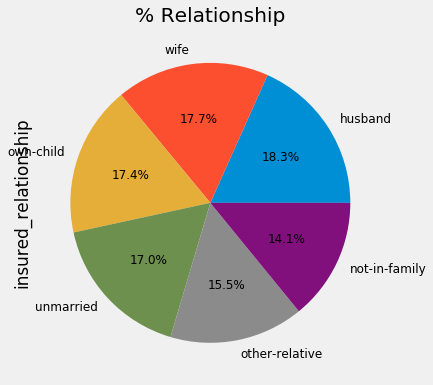

In [461]:
fig = plt.figure(figsize=(10,6))
ax = (fraud['insured_relationship'].value_counts()*100.0 /len(fraud))\
.plot.pie(autopct='%.1f%%', labels = ['husband', 'wife', 'own-child', 'unmarried', 'other-relative', 'not-in-family'],
         fontsize=12)                                                                           
ax.set_title('% Relationship')
plt.show()

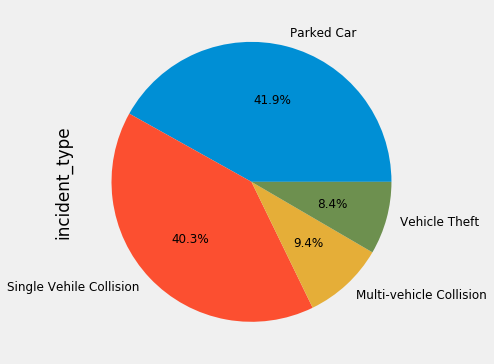

In [462]:
fig = plt.figure(figsize=(10,6))
ax = (fraud['incident_type'].value_counts()*100.0 /len(fraud))\
.plot.pie(autopct='%.1f%%', labels = ['Parked Car', 'Single Vehile Collision', 'Multi-vehicle Collision', 'Vehicle Theft'],
fontsize=12)

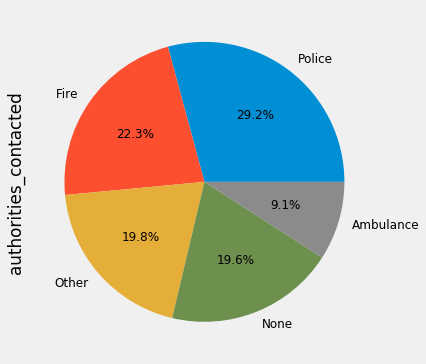

In [463]:
fig = plt.figure(figsize=(10,6))
ax = (fraud['authorities_contacted'].value_counts()*100.0 /len(fraud))\
.plot.pie(autopct='%.1f%%', labels = ['Police', 'Fire', 'Other', 'None', 'Ambulance'],
         fontsize=12)

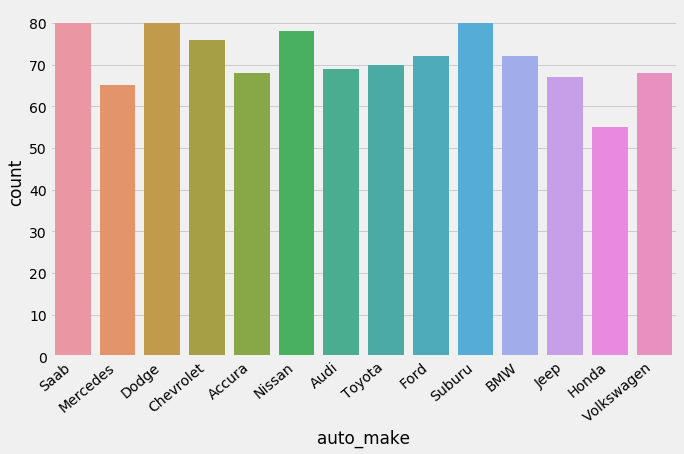

In [464]:
fig = plt.figure(figsize=(10,6))
ax = sns.countplot(x='auto_make', data=fraud)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.show()

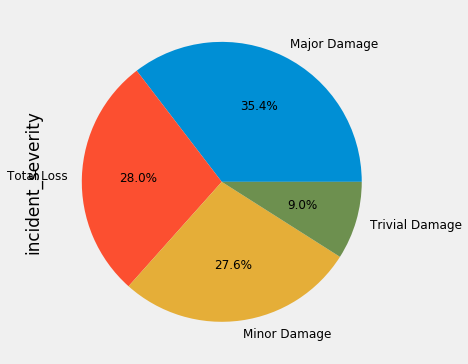

In [465]:
fig = plt.figure(figsize=(10,6))
ax = (fraud['incident_severity'].value_counts()*100.0 /len(fraud))\
.plot.pie(autopct='%.1f%%', labels = ['Major Damage', 'Total Loss', 'Minor Damage', 'Trivial Damage'],
         fontsize=12)

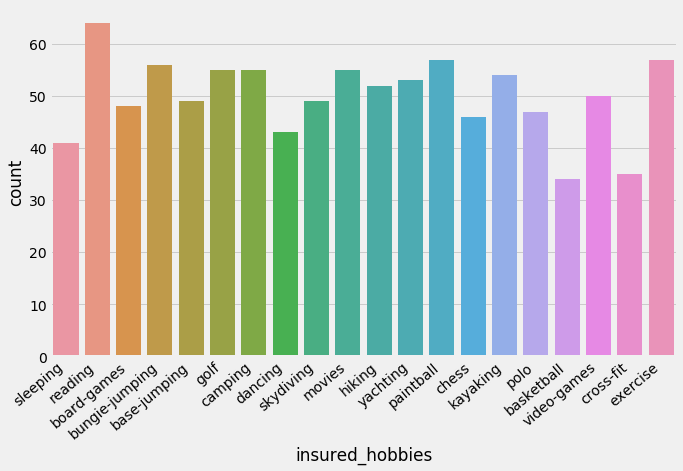

In [466]:
fig = plt.figure(figsize=(10,6))
ax = sns.countplot(x='insured_hobbies', data=fraud)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.show()

In [467]:
fraud["insured_occupation"].value_counts()

machine-op-inspct    93
prof-specialty       85
tech-support         78
sales                76
exec-managerial      76
craft-repair         74
transport-moving     72
priv-house-serv      71
other-service        71
armed-forces         69
adm-clerical         65
protective-serv      63
handlers-cleaners    54
farming-fishing      53
Name: insured_occupation, dtype: int64

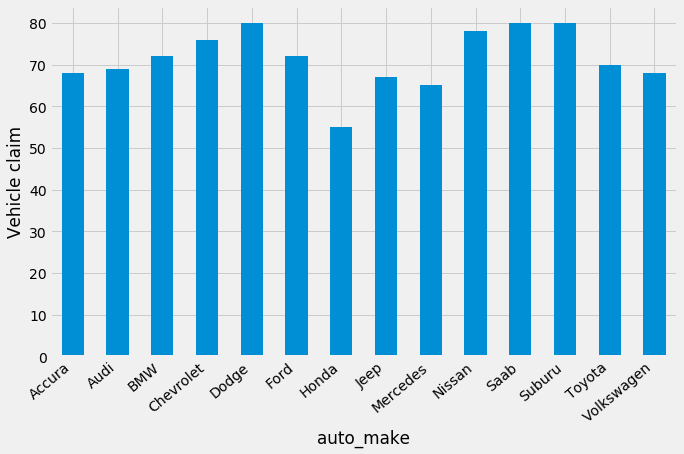

In [468]:
plt.style.use('fivethirtyeight')
fig = plt.figure(figsize=(10,6))
ax= fraud.groupby('auto_make').vehicle_claim.count().plot.bar(ylim=0)
ax.set_ylabel('Vehicle claim')
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.show()

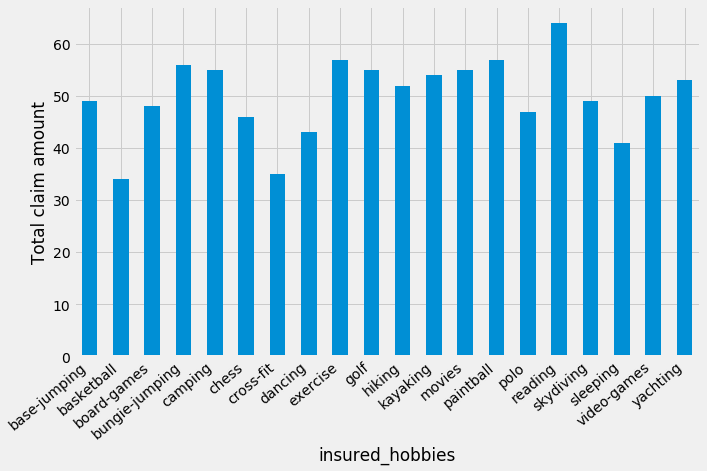

In [469]:
plt.style.use('fivethirtyeight')
fig = plt.figure(figsize=(10,6))
ax= fraud.groupby('insured_hobbies').total_claim_amount.count().plot.bar(ylim=0)
ax.set_ylabel('Total claim amount')
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.show()

In [470]:
# let's delete unnecassary columns
fraud.drop(columns=['policy_number','policy_bind_date', 'incident_date','incident_location','auto_model'],inplace=True)

# let's check the columns after deleting the columns
fraud.columns

Index(['months_as_customer', 'age', 'policy_state', 'policy_csl',
       'policy_deductable', 'policy_annual_premium', 'umbrella_limit',
       'insured_zip', 'insured_sex', 'insured_education_level',
       'insured_occupation', 'insured_hobbies', 'insured_relationship',
       'capital-gains', 'capital-loss', 'incident_type', 'collision_type',
       'incident_severity', 'authorities_contacted', 'incident_state',
       'incident_city', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_year', 'fraud_reported'],
      dtype='object')

In [471]:
fraud

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,...,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_year,fraud_reported
0,328,48,OH,250/500,1000,1406.91,0,466132,MALE,MD,...,1,2,YES,71610,6510,13020,52080,Saab,2004,Y
1,228,42,IN,250/500,2000,1197.22,5000000,468176,MALE,MD,...,0,0,NO,5070,780,780,3510,Mercedes,2007,Y
2,134,29,OH,100/300,2000,1413.14,5000000,430632,FEMALE,PhD,...,2,3,NO,34650,7700,3850,23100,Dodge,2007,N
3,256,41,IL,250/500,2000,1415.74,6000000,608117,FEMALE,PhD,...,1,2,NO,63400,6340,6340,50720,Chevrolet,2014,Y
4,228,44,IL,500/1000,1000,1583.91,6000000,610706,MALE,Associate,...,0,1,NO,6500,1300,650,4550,Accura,2009,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,OH,500/1000,1000,1310.80,0,431289,FEMALE,Masters,...,0,1,NO,87200,17440,8720,61040,Honda,2006,N
996,285,41,IL,100/300,1000,1436.79,0,608177,FEMALE,PhD,...,2,3,NO,108480,18080,18080,72320,Volkswagen,2015,N
997,130,34,OH,250/500,500,1383.49,3000000,442797,FEMALE,Masters,...,2,3,YES,67500,7500,7500,52500,Suburu,1996,N
998,458,62,IL,500/1000,2000,1356.92,5000000,441714,MALE,Associate,...,0,1,YES,46980,5220,5220,36540,Audi,1998,N


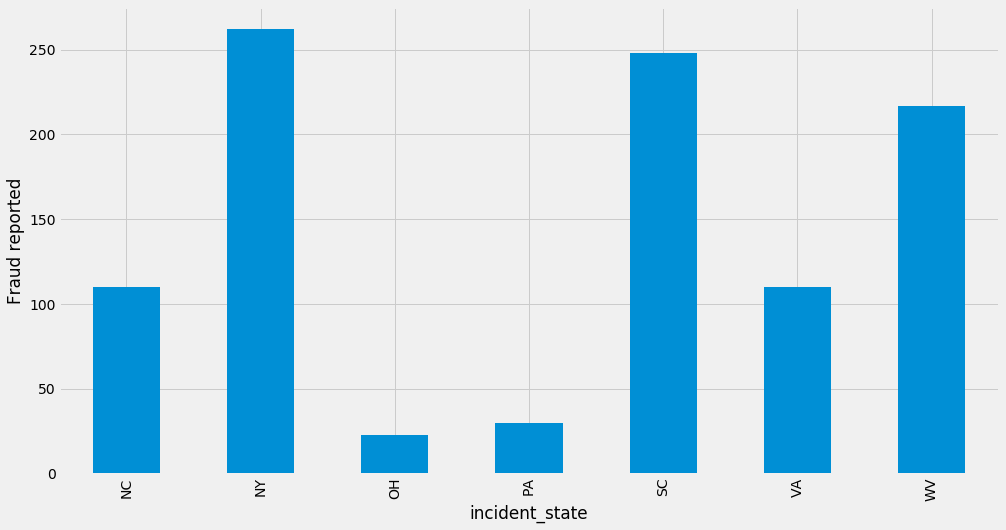

In [472]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(15,8))
ax=fraud.groupby('incident_state').fraud_reported.count().plot.bar(ylim=0)
ax.set_ylabel('Fraud reported')
plt.show()

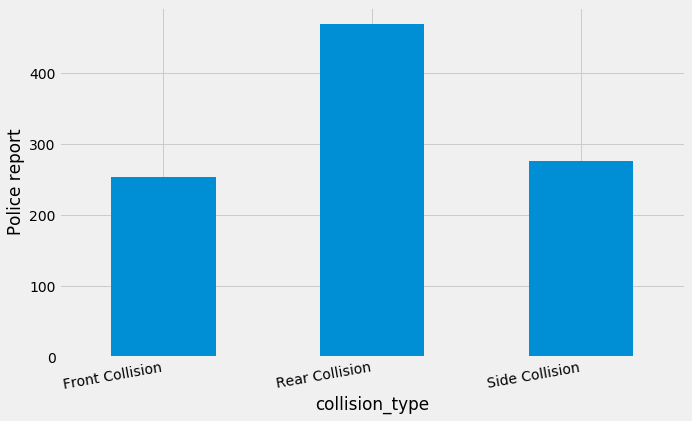

In [473]:
plt.style.use('fivethirtyeight')
fig = plt.figure(figsize=(10,6))
ax= fraud.groupby('collision_type').police_report_available.count().plot.bar(ylim=0)
ax.set_ylabel('Police report')
ax.set_xticklabels(ax.get_xticklabels(), rotation=10, ha="right")
plt.show()

In [474]:
f1 = claim.groupby(by = ["Gender","Coverage"])["Claim Amount"].sum().reset_index()
f1

,Gender,Coverage,Claim Amount
0,F,Basic,2.028053e+06
1,F,Extended,1.246781e+06
2,F,Premium,4.965635e+05
3,M,Basic,1.975733e+06
4,M,Extended,1.163349e+06
5,M,Premium,4.012342e+05


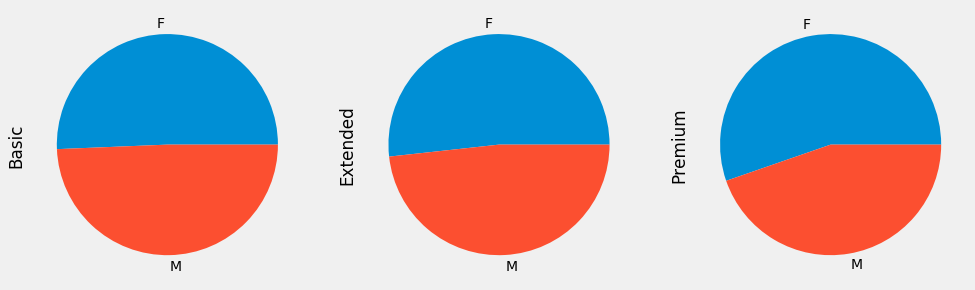

In [475]:
res = f1.pivot(index = "Coverage", columns = "Gender", values = "Claim Amount")
res
res.T.plot(kind = "pie", subplots = True, legend = False, figsize = (15,8))
plt.show()

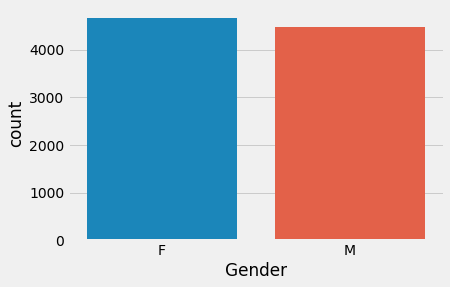

In [476]:
sns.countplot(x = "Gender", data = claim )
plt.show()

In [477]:
claim

,State,Claim Amount,Response,Coverage,Education,EmploymentStatus,Gender,Income,Location Code,Marital Status,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Claim Reason,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,Kansas,276.351928,No,Basic,Bachelor,Employed,F,56274,Suburban,Married,...,5,0,1,Corporate Auto,Corporate L3,Collision,Agent,384.811147,Two-Door Car,Medsize
1,Nebraska,697.953590,No,Extended,Bachelor,Unemployed,F,0,Suburban,Single,...,42,0,8,Personal Auto,Personal L3,Scratch/Dent,Agent,1131.464935,Four-Door Car,Medsize
2,Oklahoma,1288.743165,No,Premium,Bachelor,Employed,F,48767,Suburban,Married,...,38,0,2,Personal Auto,Personal L3,Collision,Agent,566.472247,Two-Door Car,Medsize
3,Missouri,764.586183,No,Basic,Bachelor,Unemployed,M,0,Suburban,Married,...,65,0,7,Corporate Auto,Corporate L2,Collision,Call Center,529.881344,SUV,Medsize
4,Kansas,281.369258,No,Basic,Bachelor,Employed,M,43836,Rural,Single,...,44,0,1,Personal Auto,Personal L1,Collision,Agent,138.130879,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,Missouri,2340.598798,No,Basic,Bachelor,Employed,M,71941,Urban,Married,...,89,0,2,Personal Auto,Personal L1,Hail,Web,198.234764,Four-Door Car,Medsize
9130,Missouri,309.651122,Yes,Extended,College,Employed,F,21604,Suburban,Divorced,...,28,0,1,Corporate Auto,Corporate L3,Collision,Branch,379.200000,Four-Door Car,Medsize
9131,Missouri,816.389043,No,Extended,Bachelor,Unemployed,M,0,Suburban,Single,...,37,3,2,Corporate Auto,Corporate L2,Collision,Branch,790.784983,Four-Door Car,Medsize
9132,Missouri,752.444244,No,Extended,College,Employed,M,21941,Suburban,Married,...,3,0,3,Personal Auto,Personal L2,Scratch/Dent,Branch,691.200000,Four-Door Car,Large


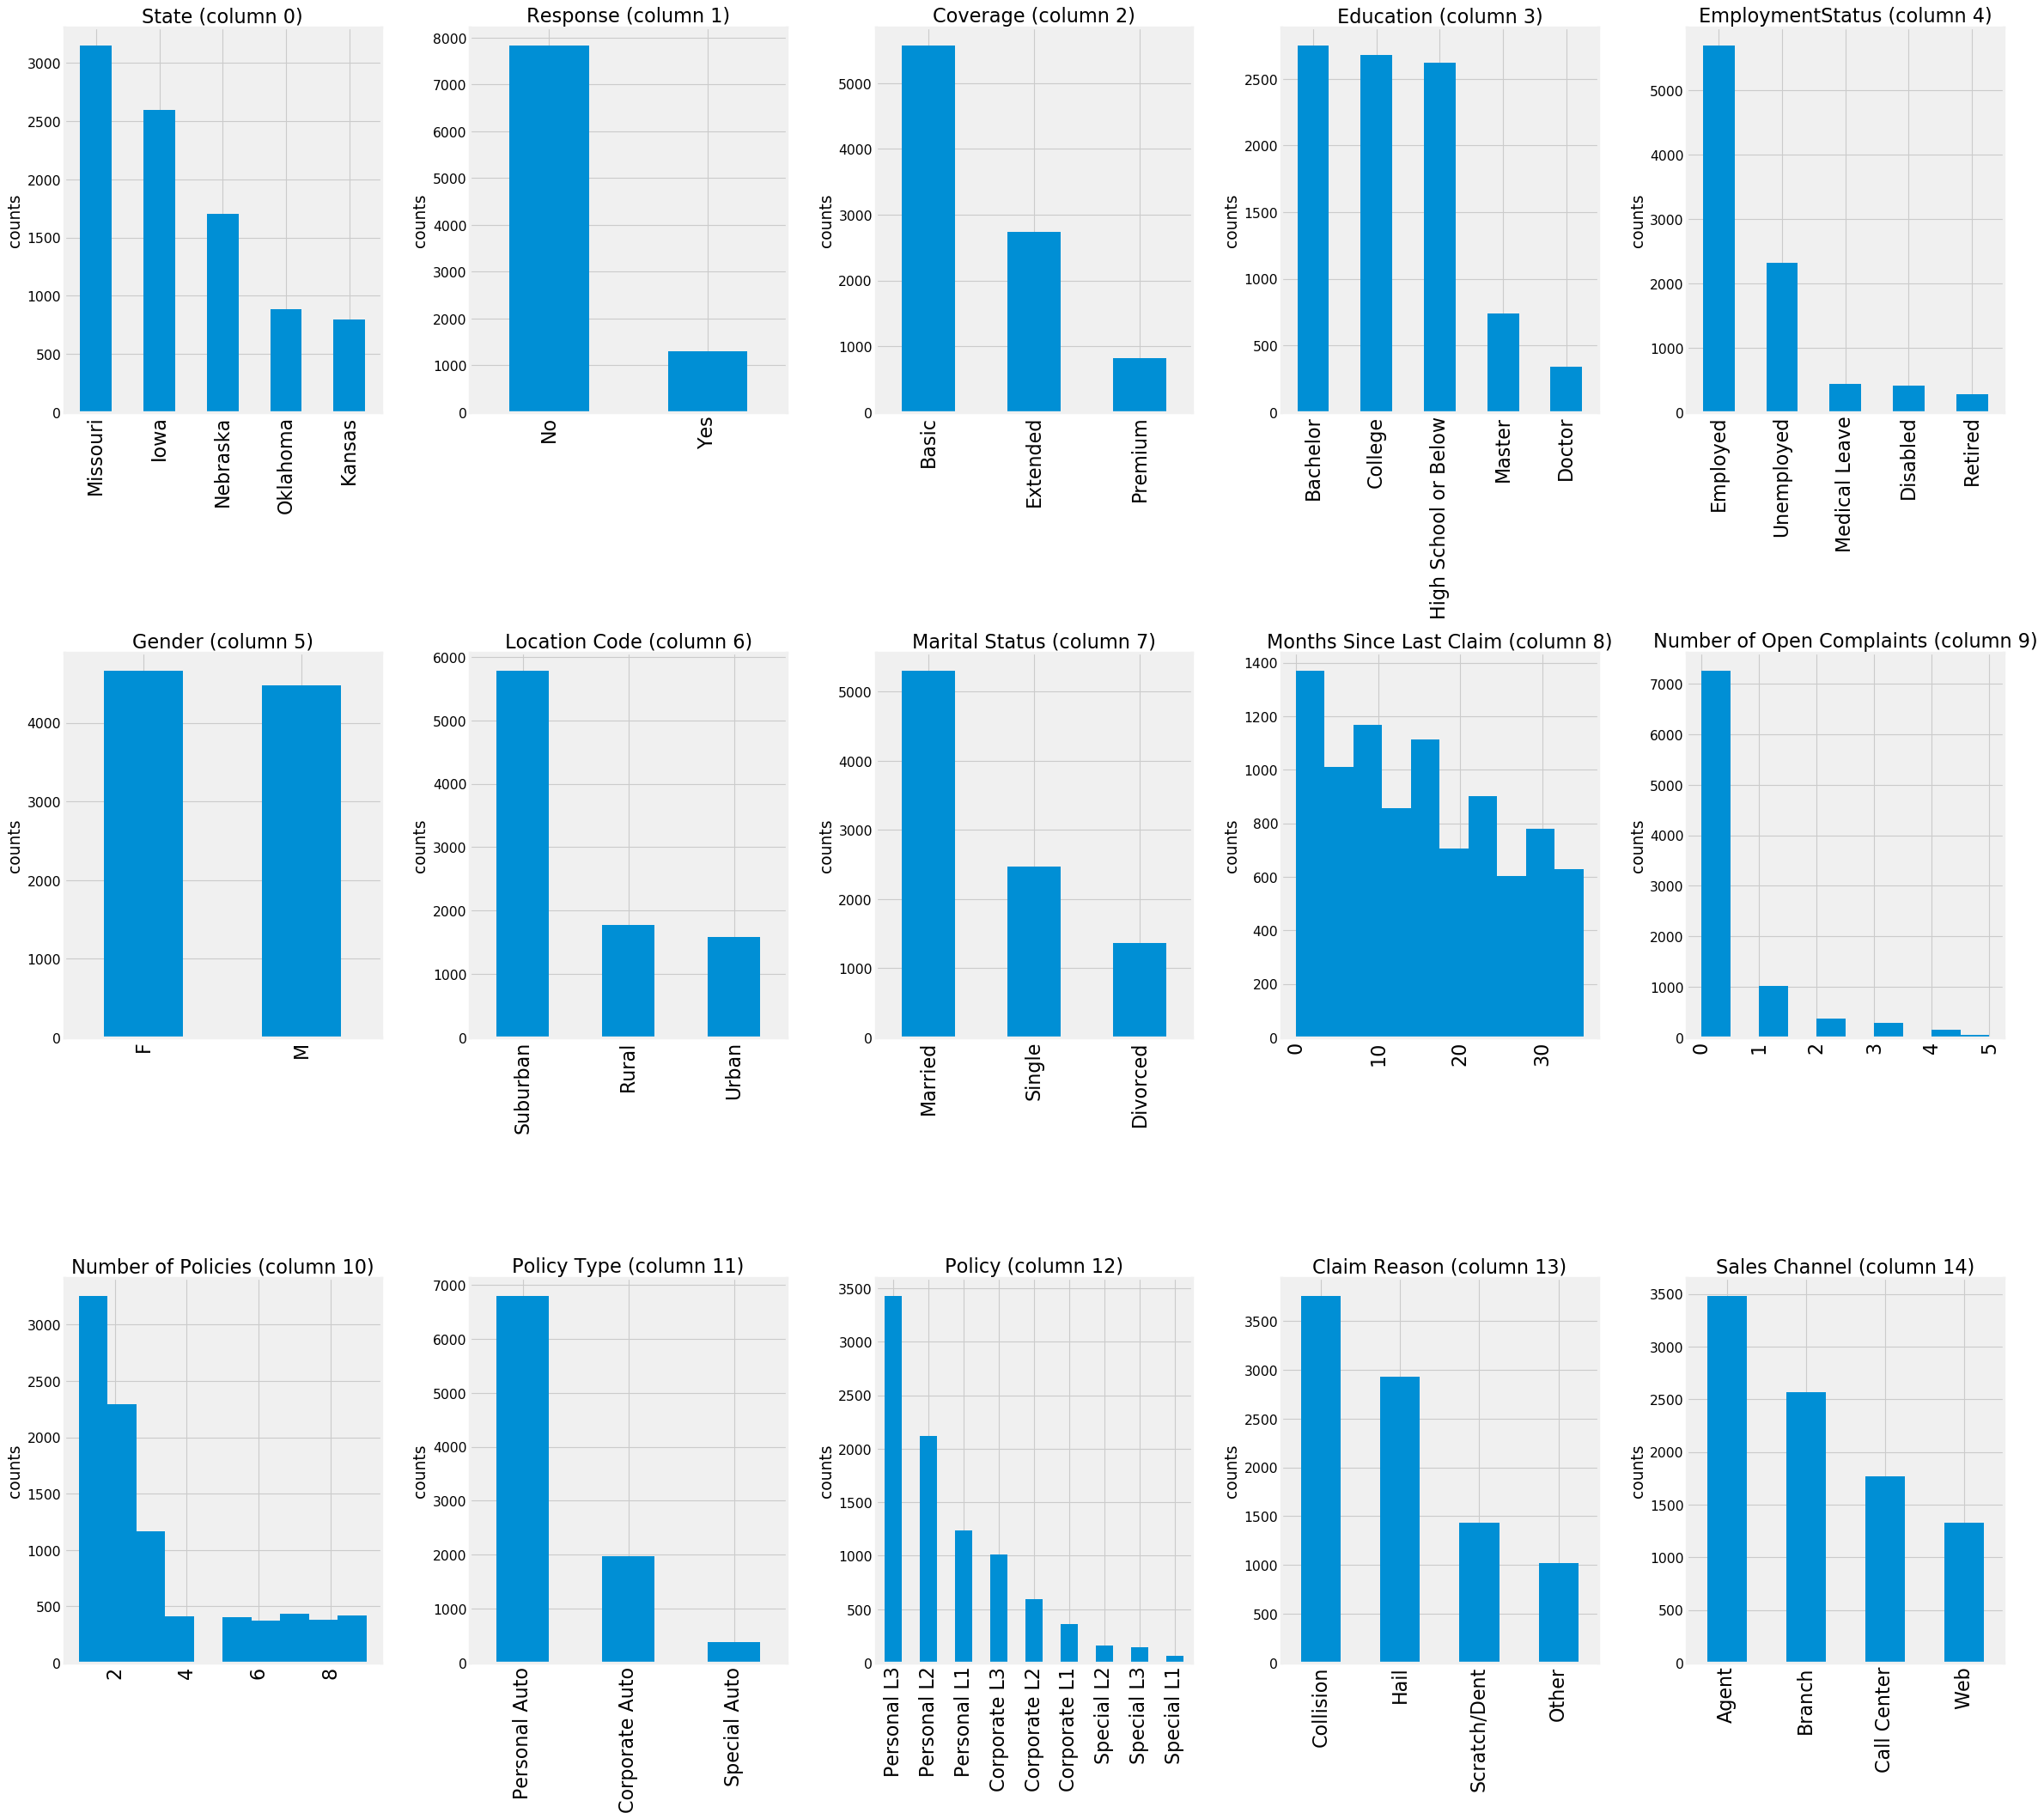

In [478]:
from mpl_toolkits.mplot3d import Axes3D
# Distribution graphs (histogram/bar graph) of column data
def plotPerColumnDistribution(claim, nGraphShown, nGraphPerRow):
    nunique = claim.nunique()
    claim = claim[[col for col in claim if nunique[col] > 1 and nunique[col] < 50]] # For displaying purposes, pick columns that have between 1 and 50 unique values
    nRow, nCol = claim.shape
    columnNames = list(claim)
    nGraphRow = (nCol + nGraphPerRow - 1) / nGraphPerRow
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnclaim = claim.iloc[:, i]
        if (not np.issubdtype(type(columnclaim.iloc[0]), np.number)):
            valueCounts = columnclaim.value_counts()
            valueCounts.plot.bar()
        else:
            columnclaim.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90,fontsize=20)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()

plotPerColumnDistribution(claim, 15, 5)

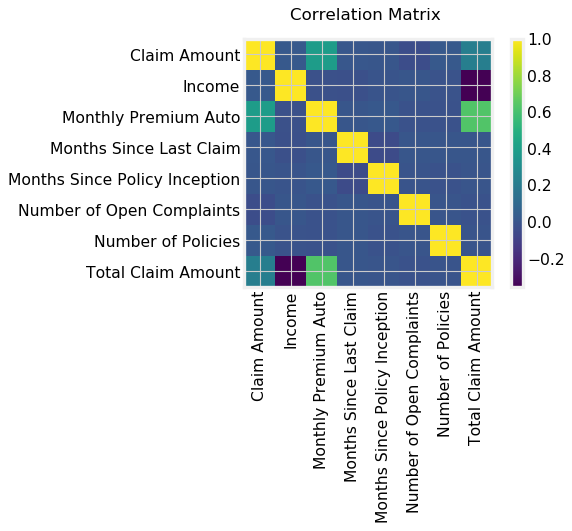

In [479]:
# Correlation matrix
corr = claim.corr()
plt.figure(num=None, dpi=80, facecolor='w', edgecolor='k')
corrMat = plt.matshow(corr, fignum = 1)
plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
plt.yticks(range(len(corr.columns)), corr.columns)
plt.gca().xaxis.tick_bottom()
plt.colorbar(corrMat)
plt.title(f'Correlation Matrix ', fontsize=15)
plt.show()


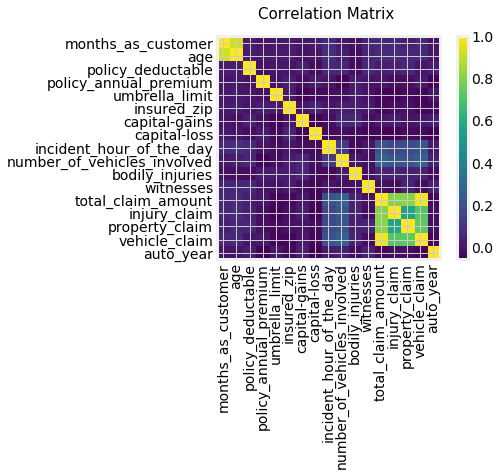

In [480]:
# Correlation matrix
corr = fraud.corr()
plt.figure(num=None, facecolor='w', edgecolor='k')
corrMat = plt.matshow(corr, fignum = 1)
plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
plt.yticks(range(len(corr.columns)), corr.columns)
plt.gca().xaxis.tick_bottom()
plt.colorbar(corrMat)
plt.title(f'Correlation Matrix ', fontsize=15)
plt.show()

In [481]:
#Lets check the correlation matrix
claim.corr()

,Claim Amount,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
Claim Amount,1.000000,0.024366,0.396262,0.011517,0.009418,-0.036343,0.021955,0.226451
Income,0.024366,1.000000,-0.016665,-0.026715,-0.000875,0.006408,-0.008656,-0.355254
Monthly Premium Auto,0.396262,-0.016665,1.000000,0.005026,0.020257,-0.013122,-0.011233,0.632017
Months Since Last Claim,0.011517,-0.026715,0.005026,1.000000,-0.042959,0.005354,0.009136,0.007563
Months Since Policy Inception,0.009418,-0.000875,0.020257,-0.042959,1.000000,-0.001158,-0.013333,0.003335
Number of Open Complaints,-0.036343,0.006408,-0.013122,0.005354,-0.001158,1.000000,0.001498,-0.014241
Number of Policies,0.021955,-0.008656,-0.011233,0.009136,-0.013333,0.001498,1.000000,-0.002354
Total Claim Amount,0.226451,-0.355254,0.632017,0.007563,0.003335,-0.014241,-0.002354,1.000000


# predict the claim amount in the Automobile insurance dataset.

In [482]:
#Lets get the list of categorical_features
cate_feat_list=list()
for col in claim.columns:
    if claim[col].dtype=="object":
        cate_feat_list.append(col)        

In [483]:
#using labelencoder to convert all the object type columns to int
from sklearn.preprocessing import LabelEncoder
for col in claim.columns:
    if claim[col].dtype=="object":
        claim[col]=LabelEncoder().fit_transform(claim[col])

In [484]:
#Lets divide the dataset into input and output
df_x=claim.drop(columns=["Claim Amount"])
y=claim[["Claim Amount"]]

In [485]:
num_cols = ['months_as_customer', 'age', 'policy_deductable', 'policy_annual_premium',
       'umbrella_limit', 'insured_zip',  'incident_hour_of_the_day','capital-loss','capital-gains'
       'number_of_vehicles_involved',  'bodily_injuries',
       'witnesses',  'total_claim_amount','injury_claim', 'property_claim']

In [486]:
# standard scaling

from sklearn.preprocessing import StandardScaler

# creating a standard scaler
sc = StandardScaler(num_cols)

# feeding independents sets into the standard scaler
df_x = sc.fit_transform(df_x)
y = sc.fit_transform(y)


In [487]:
y=y.astype('int')

In [488]:
# splitting the dataset into training and testing sets

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(df_x, y, test_size = 0.3, random_state = 30)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(6393, 21)
(2741, 21)
(6393, 1)
(2741, 1)


In [489]:
#Modelling

In [490]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import  cross_val_score 
Logistic_model = LogisticRegression(random_state=200)
Logistic_model.fit( x_train,y_train)

y_pred1_train = Logistic_model.predict(x_train)
y_pred1_test = Logistic_model.predict(x_test)

from sklearn.metrics import accuracy_score
print("Accuracy on Train using Logistic Model is:", accuracy_score(y_train, y_pred1_train))
print("Accuracy on Test using Logistic Model is:", accuracy_score(y_test, y_pred1_test))

scores = cross_val_score(Logistic_model, x_train,y_train, cv=5, scoring='accuracy')
print("Max cross validation score on logistic model",max(scores))
print("Mean cross validation score on logistic model",np.mean(scores))
print("Min cross validation score on logistic model",min(scores))

Accuracy on Train using Logistic Model is: 0.8911309244486156
Accuracy on Test using Logistic Model is: 0.8869025902955125
Max cross validation score on logistic model 0.8935837245696401
Mean cross validation score on logistic model 0.8908187025025665
Min cross validation score on logistic model 0.8881939014855356


on complete data using DT:

Accuracy on Train using Decision Tree Model is: 1.0
Accuracy on Test using Decision Tree Model is: 0.8602699744618753
Max cross validation score on DT model 0.8685446009389671
Mean cross validation score on DTmodel 0.8650093419521561
Min cross validation score on DT model 0.8608287724784989


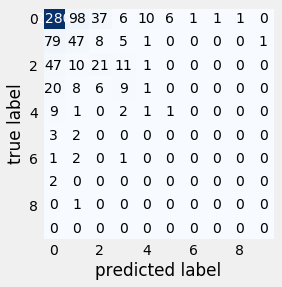

In [491]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score

DT_clf = DecisionTreeClassifier(criterion='entropy', max_depth=800,max_features=15,min_samples_split=2,min_samples_leaf=1,class_weight='balanced')

# Train Decision Tree Classifer
DT_clf = DT_clf.fit(x_train, y_train)

#Predict the response for train and validation dataset
y_pred2_train = DT_clf .predict(x_train)
y_pred2_test = DT_clf.predict(x_test)

conf_matrix = confusion_matrix(y_pred2_test, y_test)
plot_confusion_matrix(conf_matrix)

precision = precision_score(y_pred2_test, y_test, pos_label='Y',average='micro')
recall = recall_score(y_pred2_test, y_test, pos_label='Y',average='micro')


print("on complete data using DT:\n")
print("Accuracy on Train using Decision Tree Model is:", accuracy_score(y_train, y_pred2_train))
print("Accuracy on Test using Decision Tree Model is:", accuracy_score(y_test, y_pred2_test))
scores = cross_val_score(DT_clf,x_train, y_train, cv=5, scoring='accuracy')
print("Max cross validation score on DT model",max(scores))
print("Mean cross validation score on DTmodel",np.mean(scores))
print("Min cross validation score on DT model",min(scores))

ON train dataset:

on complete data using random Forest:

Accuracy on Train using random Forest Model is: 1.0
Accuracy on Test using random Forest Model is: 0.916818679314119


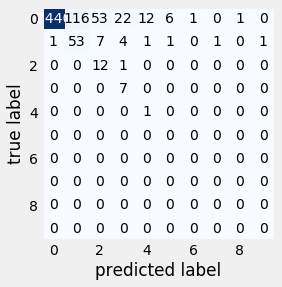

In [492]:
from sklearn.ensemble import RandomForestClassifier
RFC_model = RandomForestClassifier(random_state = 1, max_features='sqrt',oob_score=True, n_estimators = 1200)
RFC_model.fit(x_train, y_train)
y_pred3_train = RFC_model.predict(x_train)

y_pred3_test = RFC_model.predict(x_test)
print("ON train dataset:\n")

conf_matrix_train = confusion_matrix(y_pred3_test, y_test)
plot_confusion_matrix(conf_matrix_train)

precision = precision_score(y_pred3_test, y_test, pos_label='Y',average='micro')
recall = recall_score(y_pred3_test, y_test, pos_label='Y',average='micro')


print("on complete data using random Forest:\n")
print("Accuracy on Train using random Forest Model is:", accuracy_score(y_train, y_pred3_train))
print("Accuracy on Test using random Forest Model is:", accuracy_score(y_test, y_pred3_test))
scores = cross_val_score(DT_clf,x_train, y_train, cv=5, scoring='accuracy')

# predict the insurance fraud  in the Automobile insurance dataset

In [493]:
from xgboost import XGBClassifier
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier

In [494]:
fraud

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,...,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_year,fraud_reported
0,328,48,OH,250/500,1000,1406.91,0,466132,MALE,MD,...,1,2,YES,71610,6510,13020,52080,Saab,2004,Y
1,228,42,IN,250/500,2000,1197.22,5000000,468176,MALE,MD,...,0,0,NO,5070,780,780,3510,Mercedes,2007,Y
2,134,29,OH,100/300,2000,1413.14,5000000,430632,FEMALE,PhD,...,2,3,NO,34650,7700,3850,23100,Dodge,2007,N
3,256,41,IL,250/500,2000,1415.74,6000000,608117,FEMALE,PhD,...,1,2,NO,63400,6340,6340,50720,Chevrolet,2014,Y
4,228,44,IL,500/1000,1000,1583.91,6000000,610706,MALE,Associate,...,0,1,NO,6500,1300,650,4550,Accura,2009,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,OH,500/1000,1000,1310.80,0,431289,FEMALE,Masters,...,0,1,NO,87200,17440,8720,61040,Honda,2006,N
996,285,41,IL,100/300,1000,1436.79,0,608177,FEMALE,PhD,...,2,3,NO,108480,18080,18080,72320,Volkswagen,2015,N
997,130,34,OH,250/500,500,1383.49,3000000,442797,FEMALE,Masters,...,2,3,YES,67500,7500,7500,52500,Suburu,1996,N
998,458,62,IL,500/1000,2000,1356.92,5000000,441714,MALE,Associate,...,0,1,YES,46980,5220,5220,36540,Audi,1998,N


In [495]:
#using labelencoder to convert all the object type columns to int
from sklearn.preprocessing import LabelEncoder
for col in fraud.columns:
    if fraud[col].dtype=="object":
        fraud[col]=LabelEncoder().fit_transform(fraud[col])

In [497]:
#Lets divide the dataset into input and output
df_x=fraud.drop(columns=["fraud_reported"])
y=fraud[["fraud_reported"]]

In [499]:
# standard scaling

from sklearn.preprocessing import StandardScaler

# creating a standard scaler
sc = StandardScaler()

# feeding independents sets into the standard scaler
df_x = sc.fit_transform(df_x)


In [500]:
# splitting the dataset into training and testing sets

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(df_x, y, test_size = 0.3, random_state = 30)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(700, 33)
(300, 33)
(700, 1)
(300, 1)


LR: 0.741429 (0.063068)
XGB: 0.840000 (0.039279)
KNN: 0.717143 (0.044170)
DT: 0.781429 (0.052314)
SVM: 0.737143 (0.050386)
RF: 0.742857 (0.065465)
ADA: 0.781429 (0.040933)


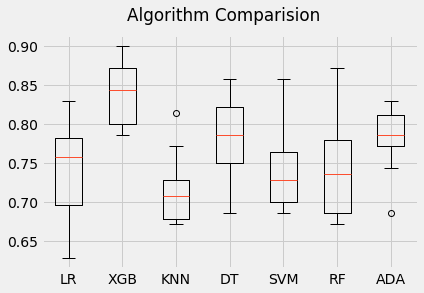

In [501]:
xgb=XGBClassifier()
logreg2=LogisticRegressionCV(solver='lbfgs', cv=10)
knn=KNeighborsClassifier(5)
svcl=SVC()
adb=AdaBoostClassifier()
dtclf=DecisionTreeClassifier(max_depth=5)
rfclf=RandomForestClassifier()
seed= 7
models = []
models.append(('LR', LogisticRegressionCV(solver='lbfgs', max_iter=5000, cv=10)))
models.append(('XGB', XGBClassifier()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('DT', DecisionTreeClassifier()))
models.append(('SVM', SVC(gamma='auto')))
models.append(('RF', RandomForestClassifier(n_estimators=100)))
models.append(('ADA', AdaBoostClassifier(n_estimators=100)))

results = []
names = []
scoring='accuracy'
for name, model in models:
    kfold=model_selection.KFold(n_splits=10, random_state=seed)
    cv_results=model_selection.cross_val_score(model, x_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg="%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

fig=plt.figure()
fig.suptitle('Algorithm Comparision')
ax=fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [502]:
xgb=XGBClassifier()
xgb_model=xgb.fit(x_train, y_train)

In [503]:

y_pred = xgb_model.predict(x_test)

In [505]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.88      0.90       233
           1       0.64      0.72      0.68        67

    accuracy                           0.85       300
   macro avg       0.78      0.80      0.79       300
weighted avg       0.85      0.85      0.85       300



(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1aa490e0f08>)

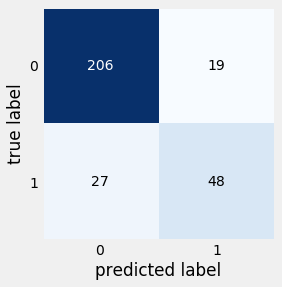

In [506]:
conf_matrix = confusion_matrix(y_pred, y_test)
plot_confusion_matrix(conf_matrix)

***